In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import re
import seaborn as sns

%matplotlib inline

C:\Users\Nguyen Manh Luc\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


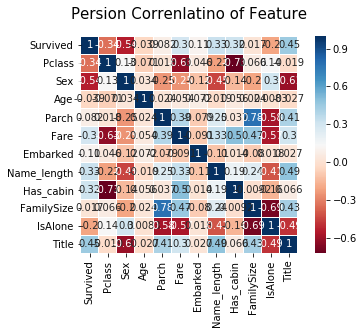

In [3]:
url_trainData = r'D:\temp\00_data\train.csv'
url_testData = r'D:\temp\00_data\test.csv'

train = pd.read_csv(url_trainData)
test = pd.read_csv(url_testData)

full_data = [train, test]

train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

train['Has_cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_cabin'] = train["Cabin"].apply(lambda x : 0 if type(x) == float else 1)

# Data bị chia làm 2 mảnh train và test, phải chạy for để cộng cho cả 2 data
# Cộng tổng số thành viên trong gia đình
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# Create new feature IsAlone from familySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

# Remove all NULLS in the Fare column and create new feature CategoricalFare
# Fare null được gán bằng trung vị của fare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

# Chia giá vé thành 4 Group khác nhau
train['CategoricalFare'] = pd.qcut(train['Fare'],4)

# Tính toán cho Columns, gồm Mean, std, tổng lượng data null
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    # Tổng data null
    age_null_count = dataset['Age'].isnull().sum()
    # Random gia tri tuoi
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

train['CategoricalAge'] = pd.cut(train['Age'], 5)

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

# Map gia tri, chuyen female -> 0, male -> 1
for dataset in full_data:
    # Maping sex
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male' : 1}).astype(int)
    # Mapping titles
    title_mapping = {'Mr':1, 'Miss': 2, 'Mrs':3, 'Master': 4, 'Rare': 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    #Mapping Embarked . Maping địa điểm lên tàu
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})
    
    #Mapping Fare, chia giá thành 4 nhóm với các khoảng định sẵn
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <=14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare' ] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] =1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'], 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
    
# Drop feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, 1)

train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

colormap = plt.cm.RdBu
plt.Figure(figsize=(30,30))
plt.title('Persion Correnlatino of Feature', y = 1.05, size = 15)

sns.heatmap(train.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square= True, cmap = colormap, linecolor = 'white', annot=True)



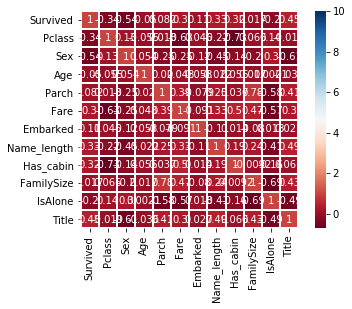

In [7]:
sns.heatmap(train.astype(float).corr(), linewidths = 1, vmax = 10, square= True, cmap = colormap, linecolor = 'white', annot=True)

In [5]:
# 1. Chuyển Continues Values sang Categories Values

# Chuyển giá trị continue sang Group
temp = pd.DataFrame(np.linspace(2,100,40), columns=['A'])
temp['QCUT'] = pd.qcut(temp.A , 3, labels = ['Tre','Trung Nien','Gia'])
temp

# Tính các giá trị trên Age
age_avg = train['Age'].mean()
age_std = train['Age'].std()
age_null_count = train['Age'].isnull().sum()

# Cách lấy random tuổi này dựa vào kinh nghiệm mỗi người

age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)

In [40]:
# 2. Thu vien re
temp = 'toi ten la nguyen manh nguyen luc123'
temp1 = re.search(r'nguyen', temp)

if temp1:
    print(temp1.group(0))
else:
    print('Khong thay')

nguyen


In [4]:
train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_cabin,FamilySize,IsAlone,Title
0,0,3,1,4,0,0,0,23,0,2,0,1.0
1,1,1,0,4,0,3,1,51,1,2,0,3.0
2,1,3,0,4,0,1,0,22,0,1,1,2.0
3,1,1,0,4,0,3,0,44,1,2,0,3.0
4,0,3,1,4,0,1,0,24,0,1,1,1.0
5,0,3,1,4,0,1,2,16,0,1,1,1.0
6,0,1,1,4,0,3,0,23,1,1,1,1.0
7,0,3,1,4,1,2,0,30,0,5,0,4.0
8,1,3,0,4,2,1,0,49,0,3,0,3.0
9,1,2,0,4,0,2,1,35,0,2,0,3.0
